In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patheffects
import matplotlib as mpl
import numpy as np
import pandas as pd
import vice

from surp.analysis.apogee_analysis import subgiants
import seaborn as sns
from surp.analysis import plotting_utils as pluto
import surp

from surp._globals import AGB_MODELS
import arya
import scipy

from surp import yields
from surp.analysis import Z_SUN, MH_to_Z, Z_to_MH

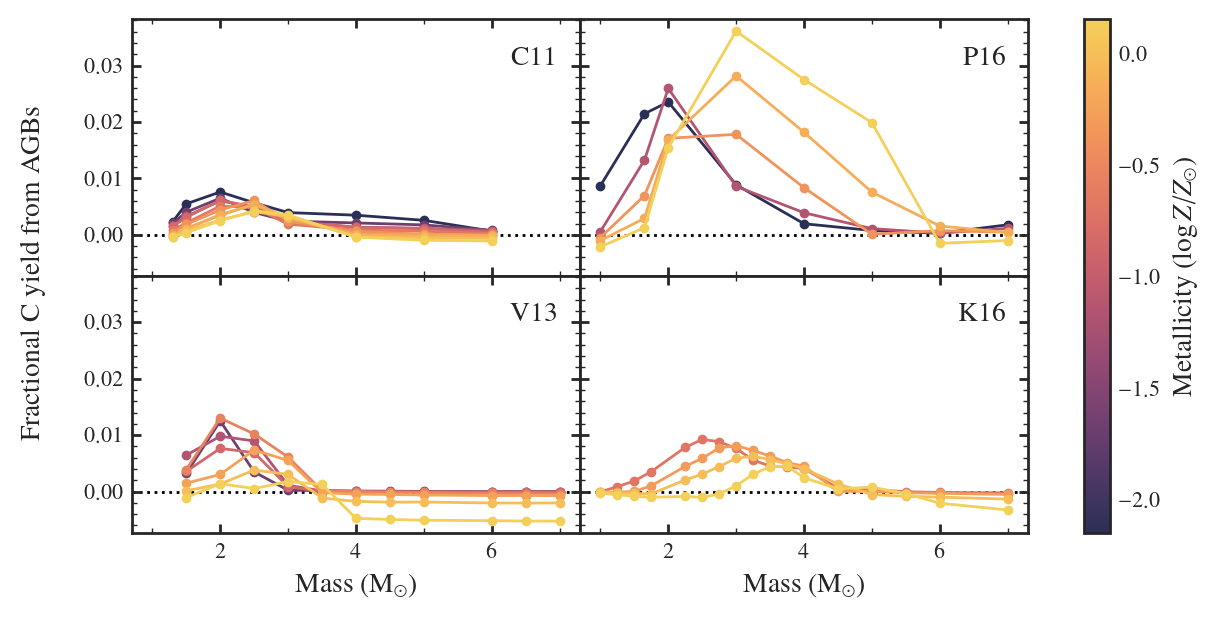

In [3]:
Z_max = 0.02
Z_min = 0.0001
AGB_LABELS = ["C11", "P16", "V13", "K16"]

hmap = arya.figure.colorbar.HueMap((np.log10(Z_min/0.014), np.log10(Z_max/0.014)))

def plot_c_table(study = "cristallo11", ax=None, fig=None, yield_kwargs, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()

    y1, m1, z1 = vice.yields.agb.grid('c', study=study)
    N = len(z1)

    for i in range(N):
        y = np.array(y1)[:,i]
        z = z1[i]
        c = hmap(np.log10(z/0.014))
        f = ax.plot(m1, y, "o", label=f"Z = {z}", c=(c), **kwargs)
        f = ax.plot(m1, y, label=f"Z = {z}", c=(c), **kwargs)
        # ax.set_xticks(np.arange(1, 8))
    
    ax.axhline(0, color="k", ls=":", zorder=-1)

    return f


fig, axs = plt.subplots(2, 2, figsize=(7, 10/3), sharex=True, sharey=True, gridspec_kw={"hspace":0, "wspace": 0, "left": 0.1})
# plt.minorticks_off()

for i in range(4):
    study = AGB_MODELS[i]
    label = AGB_LABELS[i]
    ax = axs[i//2][i%2]
    f = plot_c_table(study, ax=ax, fig=fig)
    
    ax.text(0.95, 0.9, label, horizontalalignment='right',
            verticalalignment='top', transform=ax.transAxes)
    
    
arya.Colorbar(huemap=hmap, ax=axs.ravel().tolist(), label=r"Metallicity ($\log Z/Z_\odot$)")


plt.setp(axs[-1, :], xlabel=r'Mass (${\rm M}_\odot$)')
fig.supylabel(r"Fractional C yield from AGBs")
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))

plt.savefig("figures/agb_yields.pdf")

In [16]:
def plot_agb_z(Zs, kind="line", **kwargs):
    mass_yields = []
    
    vice.yields.ccsne.settings["c"] = 0
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
        
    y_c_agb = np.array(mass_yields)/1e6 

    if kind == "line":
        return plt.plot(Z_to_MH(Zs), y_c_agb, **kwargs)
    elif kind == "scatter":
        return plt.scatter(Z_to_MH(Zs), y_c_agb, **kwargs)

Yield settings
X       CC                            agb                           SN Ia
c       4.16e-03 + 1.03e-01 (Z - Z0)  2.48 × cristallo11            0
n       7.20e-04                      0.00e+00 M + 9.00e-04 M Z/Z0  0
o       1.50e-02                      0                             0
mg      1.85e-03                      0                             0
fe      1.20e-03                      0                             1.70e-03




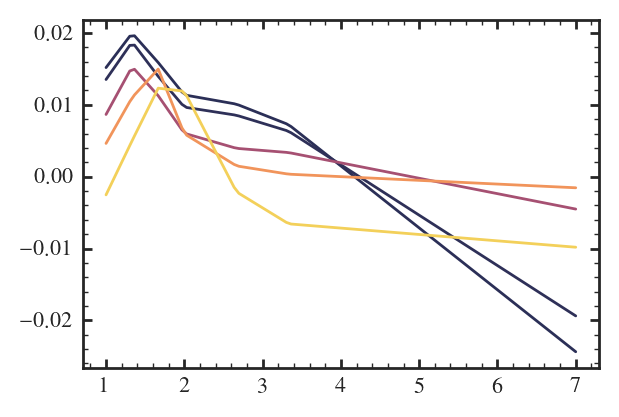

In [33]:
surp.yields.set_yields(mass_factor=1.5)
y_agb = vice.yields.agb.settings["c"]

for Z in MH_to_Z(np.linspace(-3, 0.5, 5)):
    N = 100
    Ms = np.linspace(1, 7, N)
    ys = np.zeros(N)
    
    for i in range(N):
        ys[i] = y_agb(Ms[i], Z)
    
    plt.plot(Ms, ys, color=hmap(Z_to_MH(Z)))

Yield settings
X       CC                            agb                           SN Ia
c       4.16e-03 + 1.19e-01 (Z - Z0)  2.04 × karakas16              0
n       7.20e-04                      0.00e+00 M + 9.00e-04 M Z/Z0  0
o       1.50e-02                      0                             0
mg      1.85e-03                      0                             0
fe      1.20e-03                      0                             1.70e-03




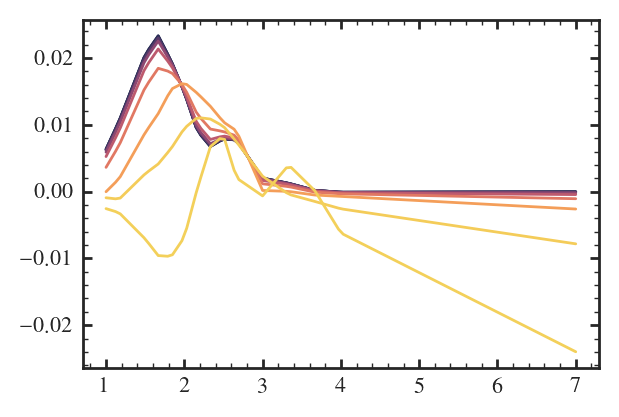

In [38]:
surp.yields.set_yields(agb_model="karakas16", mass_factor=1.5)
y_agb = vice.yields.agb.settings["c"]

for Z in MH_to_Z(np.linspace(-3, 0.5, 10)):
    N = 100
    Ms = np.linspace(1, 7, N)
    ys = np.zeros(N)
    
    for i in range(N):
        ys[i] = y_agb(Ms[i], Z)
    
    plt.plot(Ms, ys, color=hmap(Z_to_MH(Z)))

Yield settings
X       CC                            agb                           SN Ia
c       4.16e-03 + 1.59e-01 (Z - Z0)  4.73 × ventura13              0
n       7.20e-04                      0.00e+00 M + 9.00e-04 M Z/Z0  0
o       1.50e-02                      0                             0
mg      1.85e-03                      0                             0
fe      1.20e-03                      0                             1.70e-03




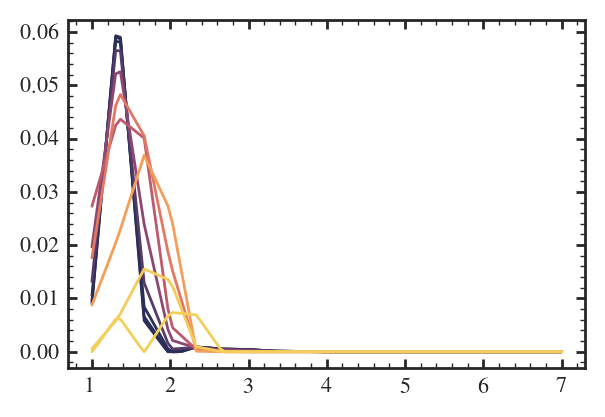

In [40]:
surp.yields.set_yields(agb_model="ventura13", mass_factor=1.5, no_negative=True)
y_agb = vice.yields.agb.settings["c"]

for Z in MH_to_Z(np.linspace(-3, 0.5, 10)):
    N = 100
    Ms = np.linspace(1, 7, N)
    ys = np.zeros(N)
    
    for i in range(N):
        ys[i] = y_agb(Ms[i], Z)
    
    plt.plot(Ms, ys, color=hmap(Z_to_MH(Z)))

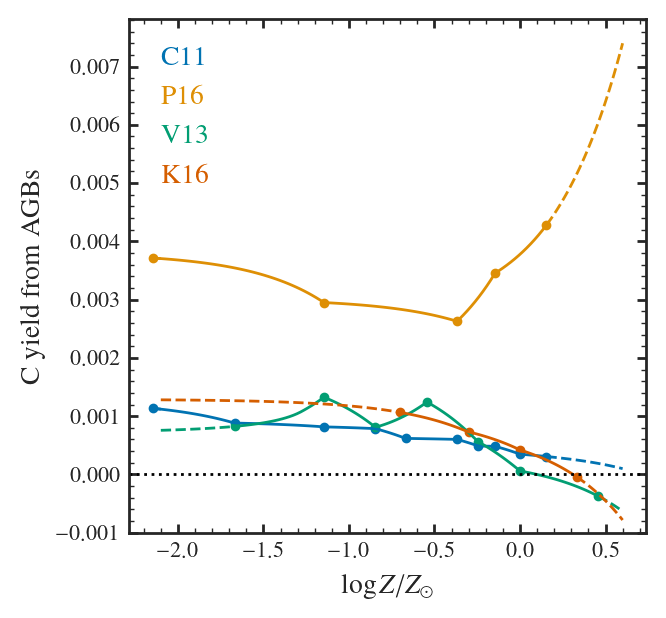

In [9]:
plt.figure(figsize=(10/3, 10/3))

for i in range(4):
    model = AGB_MODELS[i]

    vice.yields.agb.settings["c"] = model
    vice.yields.ccsne.settings["c"] = 0
    Zs = 0.014*10**np.linspace(-2, 1, 100)
    
    # plots importaint points
    y1, m1, z1 = vice.yields.agb.grid('c', study=model)
    plot_agb_z(z1)
    
    # plot solid within range
    MoverH_min = Z_to_MH(min(z1))
    MoverH_max = Z_to_MH(max(z1))
    
    Zs = MH_to_Z(np.linspace(MoverH_min, MoverH_max, 100))
    
    line, = plt.plot(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), label=["C11", "P16", "V13", "K16"][i])

    color = line.get_color()

    Zs = 0.014*10**np.linspace(-2.1, MoverH_min, 100)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
    plt.plot(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), linestyle="--", color=color)

    
    Zs = 0.014*10**np.linspace(MoverH_max, 0.6, 100)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
    plt.plot(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), linestyle="--", color=color)



# Zs = 0.014*10**np.linspace(-1, 0.5, 100)
# mass_yields = []
# vice.yields.agb.settings["c"] = surp.yields.a_agb(zeta_agb=-0.1)
# for Z in Zs:
#     m_c, times = vice.single_stellar_population("c", Z=Z)
#     mass_yields.append(m_c[-1])
    
# plt.plot(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), linestyle="-", color="red")



plt.axhline(0, color="k", ls=":")
plt.xlabel(r"$\log Z/Z_\odot$")
plt.ylabel(r"C yield from AGBs")

plt.ylim(-0.001)
prop_cycle = plt.rcParams['axes.prop_cycle']

arya.Legend(color_only=True, handlelength=0)


plt.savefig("figures/y_agb_vs_z.pdf")

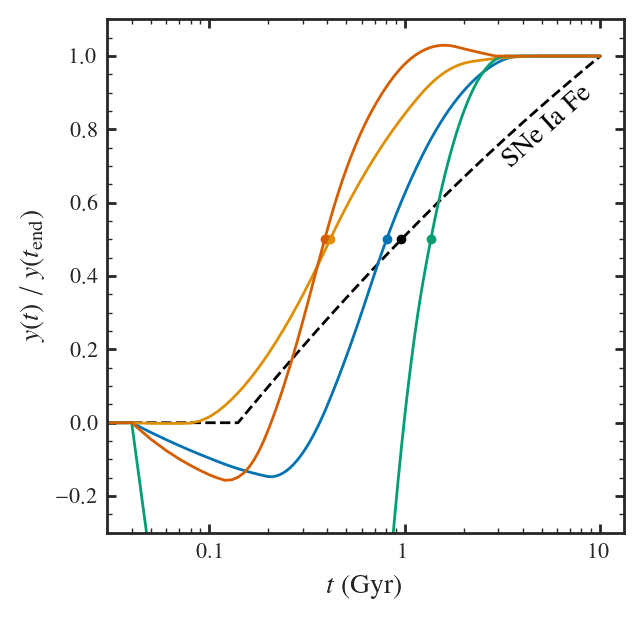

In [10]:
plt.figure(figsize=(10/3, 10/3))

vice.yields.ccsne.settings["c"] = 0
vice.yields.sneia.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0

for i in range(4):
    model = AGB_MODELS[i]
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0, dt=0.01)
    y = np.array(m_c)/m_c[-1]
    plt.plot(times, y)
    
    f = scipy.interpolate.interp1d(y, times)
    plt.scatter(f(0.5), 0.5)
    

plt.text(3, 0.7, "SNe Ia Fe", rotation=42, color="k")

m_fe, times = vice.single_stellar_population("fe", Z=0.014)
y = np.array(m_fe)/m_fe[-1]
plt.plot(times, y, 
         linestyle="--", zorder=-1, color="k")
f = scipy.interpolate.interp1d(y, times)
plt.scatter(f(0.5), 0.5, color="k")


plt.xlabel(r"$t$ (Gyr)")
plt.ylabel(r"$y(t)\;/\;y(t_{\rm end})$")
plt.xscale("log")
plt.ylim(-0.3, 1.1)
plt.xlim(0.03, 13.2)
plt.xticks([0.1, 1, 10], labels=[0.1, 1, 10])

plt.savefig("figures/y_agb_vs_t.pdf")

# Convert nugrid into VICE-format data tables

In [11]:
import pandas as pd

In [64]:
cd ~/surp/carbon_paper/

/users/PAS2232/aeyobd/surp/carbon_paper


In [65]:
yields = {}

for ele in elements:
    yields[ele] = pd.DataFrame(columns = ("mass", "Z", "yield"))

with open("../data/element_yield_table_MESAonly_fryer12_delay_total.txt") as file:
    skip = 6
    M = None
    for line in file:
        if skip > 0:
            skip -= 1
            continue
            
        if line[:7] == "H Table":
            s1, s2 = line[10:].split(",")
            M = float(s1[2:])
            Z = float(s2[2:-2])
            
            skip = 3
            continue
            
        if M is None:
            continue
        
        _, ele, y, x0, _ = line.split("&")
        y = float(y)
        x0 = float(x0)
        y0 = y - x0
        ele = ele.strip()
        
        row = pd.DataFrame({"mass":M, "Z":Z, "yield":y0}, index=[0])
        yields[ele] = pd.concat([yields[ele], row], ignore_index=True)

In [66]:
cd ../../VICE/vice/yields/agb/pignatari16/

/users/PAS2232/aeyobd/VICE/vice/yields/agb/pignatari16


In [68]:
for ele, table in yields.items():
    filename = "%s.dat" % (ele.lower())
    df = table[table.mass < 8].sort_values(by=["mass", "Z"])
    df.to_csv(filename, sep="\t", index=False, header=False)